# El modelo de Ising en 2D
Diego Hernández Rajkov

Jeronimo Zizumbo Colunga

## Introducción al modelo

El modelo de Ising es de los primeros intentos en tratar de describir sistemas magnéticos a partir de describir la interacción entre los espines vecinos de una red de átomos.

El Hamiltoniano que describe al sistema se conoce como Hamiltoniano de Heisenberg, con suposiciones de que se tiene la misma interacción para cualquier espin, esto es
\begin{equation}
\mathcal{H} = -\frac{J}{2}\sum_{<i,j>}\textbf{s}_i\cdot \textbf{s}_j - \textbf{H}\sum_{i} \textbf{s}_i
\end{equation}

Donde $\textbf{s}_i$ es el espin de la i-ésima partícula de la rad y $<i,j>$ denota los primeros vecinos de la partícula i, J es el parámetro de interacción entre los espines y $\textbf{H}$ es un campo magnético externo, en el caso que vamos a estudiar, la automagnetización del sistema, tenemos que $\textbf{H}=0$.

Notemos que el papel del parámetro de interacción es muy importante ya que si $J>0$ se tiene un sistema ferromagnético y si $J<0$ se tiene un sistema antiferromagnético.

Al ser un sistema magnético, el parámetro de orden que se va a utilizar es la magnétización del sistema, 

\begin{equation}
\textbf{M}=\sum_i \textbf{s}_i
\end{equation}

Ahora tenemos que fijar qué posibles valores de espin pueden tener las partículas de la red, en este caso se utilizará que las partículas tengan espin $\textbf{s}_i = \pm 1$, además fijaremos las constantes usales a 1, \textit{i.e.} la interacción $J=1$, la constante de boltzman $k_B = 1$.

## Transiciones de fase

El modelo de Ising en 1D fue resuelto de manera analítica por Ising en 1925, mientras que el modelo en 2D se resolvió hasta 1944 por Onsager para un red cuadrada utilizando la teoría de campo medio. El problema en 3D aún no posee una solución analítica.

En el modelo 1D, el sistema de espines no describe una transición de fase de ningún orden. Sin embargo en modelo en 2D sí presenta una trancisión de orden, de segundo orden. Por lo tanto calculando las derivadas de propiedades extensivas, como lo son el calor específico, $C_H$, y la suceptibilidad magnética, $\chi_M$; debería de presentar discontinuidades en el punto crítico de transición.

## La solución numérica
### El algoritmo de Metropolis-Hastings

El método de Metropolis-Hastings se basa en un proceso estadístico en la que si se tiene una distribución de probabilidad de estar en una configuración particular del estado entonces se puede definir una probabilidad de transición entre estos estados. El problema surge de la enorme cantidad de estados posibles del sistema, $2^N$. La forma se resolver esto es a partir de una cadena de Markov, de forma que la solución del problema es la solución estacionaria de tal cadena de Markov. Para simplificar más el problema se supone un concepto llamado *Balance detallado* que nos dice que la probabilidad de estar en el estado $i$ y realizar una transición a un estado $j$ es la misma que estar en el estado $j$ y realizar una transición al estado $i$, es decir

$$P_i\mathcal{P}_{ij} = P_j\mathcal{P}_{ji}$$

Usando esto como base del algoritmo podemos entonces identificar lo siguiente:

$$
\frac{\mathcal{P}(\{n\})}{\mathcal{P}(\{m\})} = \frac{\mathcal{P}(\{m\}\rightarrow \{n\})}{\mathcal{P}(\{n\}\rightarrow \{m\})} = exp\left(-\frac{1}{T}(E(\{n\}-E(\{m\})\right)
$$


De esta forma si el estado del sistema es $\{m\}$, entonces se propone una nueva configuración del sistema, $\{n\}$, con cierta probabilidad $g(\{m\}\rightarrow \{n\})$.

Una vez propuesto el nuevo estado, éste es aceptado con una probabilidad $\alpha(\{m\}\rightarrow \{n\})$, o rechazado con probabilidad $1-\alpha(\{m\}\rightarrow \{n\})$. 

De esta forma la probabilidad de transición de un esta dada por 
\begin{equation}
\mathcal{P}(\{m\}\rightarrow \{n\}) = g(\{m\}\rightarrow \{n\})\alpha(\{m\}\rightarrow \{n\})
\end{equation}

La ecuación de balance detallado es 

\begin{equation}
\frac{\mathcal{P}(\{n\})}{\mathcal{P}(\{m\})} =\frac{g(\{m\}\rightarrow \{n\})\alpha(\{m\}\rightarrow \{n\})}{g(\{n\}\rightarrow \{m\})\alpha(\{n\}\rightarrow \{m\})} 
\end{equation}

De donde

\begin{equation}
\frac{\alpha(\{m\}\rightarrow \{n\})}{\alpha(\{n\}\rightarrow \{m\})} = \frac{\mathcal{P}(\{n\})g(\{n\}\rightarrow \{m\})}{\mathcal{P}(\{m\})g(\{m\}\rightarrow \{n\})} 
\end{equation}

Por lo tanto se debe de cumplir que
\begin{equation}
\alpha(\{m\}\rightarrow \{n\}) = min\left(1, \frac{\mathcal{P}(\{n\})g(\{n\}\rightarrow \{m\})}{\mathcal{P}(\{m\})g(\{m\}\rightarrow \{n\})}\right)
\end{equation}

En nuestro caso tenemos que 
$$
\frac{\mathcal{P}(\{n\})g(\{n\}\rightarrow \{m\})}{\mathcal{P}(\{m\})g(\{m\}\rightarrow \{n\})} = \exp(-\Delta E(\{n\},\{m\})/T)
$$

Por lo tanto $\alpha(\{m\}\rightarrow \{n\}) = min\left(1, \exp(-\Delta E(\{n\},\{m\})/T)\right)$

Donde $\Delta E(\{n\},\{m\})$ es el cambio de energía que aporta realizar el cambio de la configuración, $\Delta E$ puede ser positivo o negativo.

#### La forma del algoritmo es

    1. Generar un estado aleatorio inicial
    2. Tomar un espin de forma aleatorea de la red y cambiar su proyección
    3. Calcular el cambio de energía que esto provoca en el sistema
    4. Proponer un número aleatoreo entre 0 y 1 y ver si es menor que la probabilidad de aceptación del estado, dado por alpha
    5. Si el estado no fue aceptado se repite el proceso desde el paso 2.
    6. Se el estado fue aceptado se deben de actualizar tanto el estado del sistema como las cantidades de interés, como lo es la magnetización y la energí; y se repite el proceso desde el paso 2.



### Las variables termodinámicas por calcular

Las variables termodinámicas que debemos de calcular son las siguientes

La Energía: $E = \frac12 \sum_{<i,j>} s_i s_j$

La Magnetización: $M = \sum_{i} s_i$

La suceptibilidad magnética: $\chi_M = \left(\frac{\partial M}{\partial H}\right)_T = \frac{1}
{T^2} (<E^2>-<E>^2)$

El calor específico: $C_H = \left(\frac{\partial E}{\partial T}\right)_H= \frac{1}
{T} (<M^2>-<M>^2)$


A lo largo de la simulación se van realizando promedios de las variables anteriores de forma que el resultado que obtengamos no sea producto de un posible estado final sino de un conjunto estadisticamente representable del estado físico en que se encuentra el sistema. Para esto vamos a calcular la cantidades asociadas a la magnetización de dos formas distintas:

\begin{align}
\bar{M} &= \sum_{k} M_k\\
\bar{M_{abs}} &= \sum_{k} |M_k|
\end{align}

Donde $M_k$ es la magnetización en el paso k montecarlo. De forma análoga se definen

\begin{align}
\bar{\chi}_M &= \sum_{k} \frac{1}{T} (<M_k^2>-<M_k>^2)\\
\bar{\chi}_{M_{abs}} &= \sum_{k}\frac{1}{T} (<|M_k|^2>-<|M_k|>^2)
\end{align}

Esta forma de definir las cantidades en función del valor absoluto de la magnetización hace que las cantidades varien de forma mas "suave" que las cantidades sin valor absoluto, como se puede ver el las gráficas mas adelante.

**Aclaremos que para realizar los calculos numéricos el programa se ejecutó desde la terminal con el proposito de utilizar computo en parralelo con el fin de realizar los cálculos para distíntas temperaturas al mismo tiempo. Se utilizaron 4 procesadores  y un tiempo total de computo de alrededor de 24-27 horas, *(mi computadora casi muere en el intento)*.**

### El código que se presenta acontinuación corresponde al código de script
Los datos se encuentran en el link https://github.com/diegohdzrjk/Proyecto-Computacional/tree/master/Ising, así como el resto de las imágenes, que fueron generadas en un notebook de Mathematica.

El conjunto del programa es el siguiente, se generaron distintas librerias segun se queria obtener alguna información en particular:

    Para generar los datos en un .csv se utilizó el modulo Ising_cuad.jl

    Para generar las imágenes en .jpg se utilizó el modulo Ising_cuad_images.jl

    Para generar el estudio de convergencia en .jpg se utilizó el modulo Ising_cuad_convergencia.jl
    
Desde el programa *master*, Ising.jl, se importan estos modulos y se ejecutan las funciones con distintos parámetros.

In [14]:
using PyPlot

In [1]:
function configuration_run_scrip(Spins::Array{Float64,1}, L::Int64, S::Array{Float64,2}, T::Float64, n::Array{Int64,1},
    E_sys::Float64, Mag::Float64, doc_path::AbstractString)

    N = L*L
    Steps = n[1]*N
    Steps_prom = n[2]*N

    Corr_array = zeros(Float64, div(L,2)+1)

    # Informacion sobre las energias y magnetizaciones
    datos = zeros(Float64, 5)
    folder_path = doc_path*@sprintf("/T_%.4f",T)
    for step in 1:Steps
        # Se calcula el cambio de un spin aleatorio
        i = rand(1:N)
        sp = rand(Spins)
        # Se calcula el cambio de energia debido al cambio del espin
        DeltaE = S[div(i-1,L)*L+mod(i,L)+1] + S[mod(i-1+L,N)+1]
        DeltaE += S[div(i-1,L)*L+mod(i-2,L)+1] + S[mod(i-1-L,N)+1]
        DeltaE *= S[i]-sp

        # Se determina la probabilidad de que se acepte el cambio
        if rand() < min(1.0, exp(-DeltaE/T))
            # Se actualiza el estado del sistema
            E_sys += DeltaE  # Se cambia la energia del sistema
            Mag += sp-S[i]   # Se cambia la magnetizacion del sistema
            S[i] = sp        # Se actualiza el espin del sitio i,j
        end

        if step > Steps-Steps_prom
            # Se calculan los promedios de la energia y la magnetizacion del sistema
            # Se calculan los promedios de los cuadrados la energia y la magnetizacion del sistema
            datos += [E_sys/Steps_prom, E_sys*E_sys/Steps_prom, Mag/Steps_prom, abs(Mag)/Steps_prom, Mag*Mag/Steps_prom]

            if mod(step,N) == 0
                for r in 0:div(L,2)
                    Corr = (circshift(S,(r,0)) + circshift(S,(-r,0)) + circshift(S,(0,r)) + circshift(S,(0,-r))).*S
                    Corr_array[r+1] += 0.25*mean(Corr)
                end
            end
        end
    end

    # Se calculan las susceptibilidades
    # Se calculan las susceptibilidades
    Cv = (datos[2] - datos[1]*datos[1])/(T*T)
    Chi_m = (datos[5] - datos[3]*datos[3])/T
    Chi_m_abs = (datos[5] - datos[4]*datos[4])/T

    Corr_array = Corr_array/n[2]

    return datos[1], abs(datos[3])/N, datos[4]/N, Cv, Chi_m, Chi_m_abs, Corr_array
end

function simulacion_scrip(spin::Float64,L::Int64,Ti::Float64,Tf::Float64,Tstep::Float64,n::Array{Int64,1}, doc_path::AbstractString)
    @printf "Temperaturas -> %.4f - %.4f en pasos de %.4f\n" Ti Tf Tstep
    @printf "Red de %dx%d\n" L L
    @printf "Pasos Montecarlo -> %d\n" n[1]

    # Se definen los espines posibles del Sistema y la lista de posibles combinaciones
    Spins = collect(-2*spin:2:2*spin)
    @show Spins

    # Se define el tamano de los arreglos y los arreglos
    Temperatures = collect(Ti:Tstep:Tf)   # La temperatura

    data_folder = doc_path*@sprintf("/Ising_DATA_cuadrado_L%d_MC%d_T%.4f_%.4f", L, n[1], Ti, Tf)
    try
        mkdir(data_folder)
    end
    println("Se creo la carpeta "*data_folder)

    # Se defina el path donde se van a guardar los datos
    doc_data = data_folder*"/data.csv"
    doc_logs = data_folder*"/logs.csv"
    doc_corr = data_folder*"/correlacion.csv"

    out_data = open(doc_data, "w")
    out_logs = open(doc_logs, "w")
    out_corr = open(doc_corr, "w")

    write(out_logs, @sprintf("Tiempo inicial %s \n", string(now())))
    write(out_logs, @sprintf("L=%d - Mc=%d\n", L, n[1]))
    write(out_data, @sprintf("T,E,M,M_abs,Cv,Chim,Chim_abs\n"))

    r_s = ""
    for r in 0:div(L,2)
        r_s *= @sprintf(",%d", r)
    end
    write(out_corr, "T"*r_s*"\n")

    flush(out_logs); flush(out_data); flush(out_corr)
    close(out_logs); close(out_data); close(out_corr)

    # Se crea una matriz de spines comun a todas las temperaturas
    S_ini = rand(Spins,L,L)
    A = circshift(S_ini,(1,0))+circshift(S_ini,(-1,0))+circshift(S_ini,(0,1))+circshift(S_ini,(0,-1))

    # Se divide el producto de S con A entre 2 ya que se cuenta la
    # interaccion 2 veces cuando se realiza el producto
    E_sys = sum(S_ini.*A)/2.0
    Mag = sum(S_ini)

    @sync @parallel for t in 1:size(Temperatures)[1]
        tic()
        S = copy(S_ini)
        E, M, M_abs, Cv, Chi_m, Chi_m_abs, Correl_array = configuration_run(Spins, L, S, Temperatures[t], n, E_sys, Mag, data_folder)
        tot_time = toq()
        out_data = open(doc_data, "a")
        write(out_data, @sprintf("%.5f,%.10f,%.10f,%.10f,%.10f,%.10f,%.10f\n", Temperatures[t], E, M, M_abs, Cv, Chi_m, Chi_m_abs))
        flush(out_data); close(out_data)

        corr_str = @sprintf("%.5f", Temperatures[t])
        for r in 1:div(L,2)+1
            corr_str *= @sprintf(",%.5f", Correl_array[r])
        end

        corr_str *= "\n"
        out_corr = open(doc_corr, "a")
        write(out_corr, corr_str)
        flush(out_corr); close(out_corr)

        out_logs = open(doc_logs, "a")
        write(out_logs, @sprintf("%.4f\n", tot_time))
        flush(out_logs); close(out_logs)

        # Se imprime el progreso del programa
        @printf "%f\n" Temperatures[t]
    end
    out_logs = open(doc_logs, "a")
    write(out_logs, @sprintf("Tiempo final %s \n", string(now())))
    flush(out_logs)
    close(out_logs)
end

simulacion_scrip (generic function with 1 method)

### A continuación se crean las funciones que se utilizaran para generar imágenes dentro del notebook

In [24]:
function configuration_run(Spins::Array{Float64,1}, L::Int64, S::Array{Float64,2}, 
    T::Float64, n::Array{Int64,1}, E_sys::Float64, Mag::Float64)

    N = L*L
    Steps = n[1]*N
    Steps_prom = n[2]*N

    # Informacion sobre las energias y magnetizaciones
    datos = zeros(Float64, 5)
    for step in 1:Steps
        # Se calcula el cambio de un spin aleatorio
        i = rand(1:N)
        sp = rand(Spins)
        # Se calcula el cambio de energia debido al cambio del espin
        DeltaE = S[div(i-1,L)*L+mod(i,L)+1] + S[mod(i-1+L,N)+1]
        DeltaE += S[div(i-1,L)*L+mod(i-2,L)+1] + S[mod(i-1-L,N)+1]
        DeltaE *= S[i]-sp

        # Se determina la probabilidad de que se acepte el cambio
        if rand() < min(1.0, exp(-DeltaE/T))
            # Se actualiza el estado del sistema
            E_sys += DeltaE  # Se cambia la energia del sistema
            Mag += sp-S[i]   # Se cambia la magnetizacion del sistema
            S[i] = sp        # Se actualiza el espin del sitio i,j
        end

        if step > Steps-Steps_prom
            # Se calculan los promedios de la energia y la magnetizacion del sistema
            # Se calculan los promedios de los cuadrados la energia y la magnetizacion del sistema
            datos += [E_sys/Steps_prom, E_sys*E_sys/Steps_prom, Mag/Steps_prom, abs(Mag)/Steps_prom, Mag*Mag/Steps_prom]
        end
    end

    # Se calculan las susceptibilidades
    # Se calculan las susceptibilidades
    Cv = (datos[2] - datos[1]*datos[1])/(T*T)
    Chi_m = (datos[5] - datos[3]*datos[3])/T
    Chi_m_abs = (datos[5] - datos[4]*datos[4])/T

    return datos[1], abs(datos[3])/N, datos[4]/N, Cv, Chi_m, Chi_m_abs
end



function simulacion(spin::Float64,L::Int64,Ti::Float64,Tf::Float64,
    Tstep::Float64,n::Array{Int64,1})
    @printf "Temperaturas -> %.4f - %.4f en pasos de %.4f\n" Ti Tf Tstep
    @printf "Red de %dx%d\n" L L
    @printf "Pasos Montecarlo -> %d\n" n[1]

    # Se definen los espines posibles del Sistema y la lista de posibles combinaciones
    Spins = collect(-2*spin:2:2*spin)
    @show Spins

    # Se define el tamano de los arreglos y los arreglos
    Temperatures = collect(Ti:Tstep:Tf)   # La temperatura
    
    N = length(Temperatures)
    E = zeros(Float64, N)
    M = zeros(Float64, N)
    M_abs = zeros(Float64, N)
    Cv = zeros(Float64, N)
    Chi_m = zeros(Float64, N)
    Chi_m_abs = zeros(Float64, N)
    
   # Se crea una matriz de spines comun a todas las temperaturas
    S_ini = rand(Spins,L,L)
    A = circshift(S_ini,(1,0))+circshift(S_ini,(-1,0))+circshift(S_ini,(0,1))+circshift(S_ini,(0,-1))

    # Se divide el producto de S con A entre 2 ya que se cuenta la
    # interaccion 2 veces cuando se realiza el producto
    E_sys = sum(S_ini.*A)/2.0
    Mag = sum(S_ini)

    for t in 1:N
        tic()
        S = copy(S_ini)
        E[t], M[t], M_abs[t], Cv[t], Chi_m[t], Chi_m_abs[t] = configuration_run(Spins, L, S, Temperatures[t], n, E_sys, Mag)
        tot_time = toq()

        # Se imprime el progreso del programa
        @printf "%.3f\t%fs\n" Temperatures[t] tot_time
    end
    
    return Temperatures, E, M, M_abs, Cv, Chi_m, Chi_m_abs
end

simulacion (generic function with 1 method)

In [62]:
T, E, M, M_abs, Cv, Chi_m, Chi_m_abs = simulacion(0.5, 15, 1.0, 3.5, 0.01, [30000, 5000]);

Temperaturas -> 1.0000 - 3.5000 en pasos de 0.0100
Red de 15x15
Pasos Montecarlo -> 30000
Spins = [-1.0,1.0]
1.000	1.576264s
1.010	1.517374s
1.020	1.636329s
1.030	1.643774s
1.040	1.654852s
1.050	1.637048s
1.060	1.649787s
1.070	1.546838s
1.080	1.560075s
1.090	1.655593s
1.100	1.814827s
1.110	1.741445s
1.120	1.703274s
1.130	1.758672s
1.140	1.681463s
1.150	1.670281s
1.160	1.571373s
1.170	1.640378s
1.180	1.691531s
1.190	1.677632s
1.200	1.715039s
1.210	1.790469s
1.220	1.749089s
1.230	1.711977s
1.240	1.617250s
1.250	1.595073s
1.260	1.595072s
1.270	1.619993s
1.280	1.635190s
1.290	1.692289s
1.300	1.555641s
1.310	1.517823s
1.320	1.519198s
1.330	1.518349s
1.340	1.507243s
1.350	1.660782s
1.360	1.724005s
1.370	1.720255s
1.380	1.684002s
1.390	1.641450s
1.400	1.639056s
1.410	1.541201s
1.420	1.572339s
1.430	1.541247s
1.440	1.629750s
1.450	1.595054s
1.460	1.582323s
1.470	1.576961s
1.480	1.563542s
1.490	1.557254s
1.500	1.492209s
1.510	1.547057s
1.520	1.528543s
1.530	1.498555s
1.540	1.498403s
1.550	1.508

### La energía en función de la temperatura

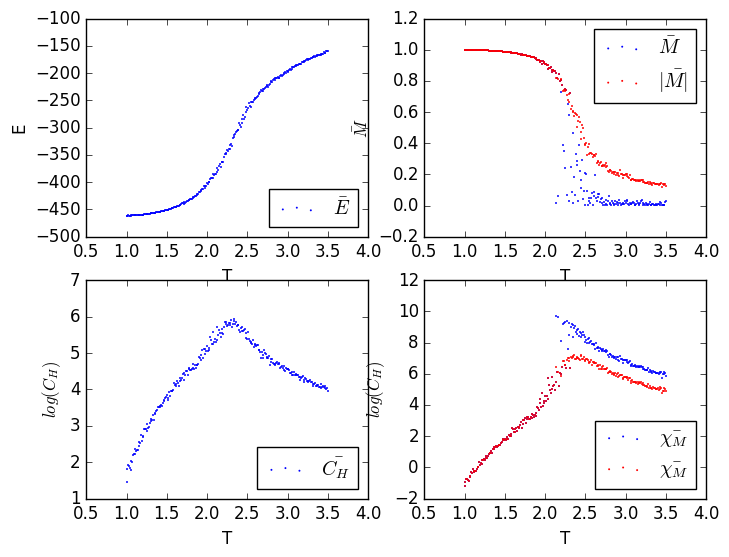

PyObject <matplotlib.legend.Legend object at 0x3239c4e50>

In [88]:
subplot(221)
scatter(T, E, s=2, linewidths=0, label="\$\\bar\{E\}\$")
xlabel("T"); ylabel("E"); legend(loc=4)

subplot(222)
scatter(T, M, c="blue", s=2, linewidths=0, label="\$\\bar\{M\}\$")
scatter(T, M_abs, c="red", s=2, linewidths=0, label="\$\\bar\{|M|\}\$")
xlabel("T"); ylabel("\$\\bar\{M\}\$"); legend(loc=1)

subplot(223)
scatter(T, log(Cv), s=2, linewidths=0, label="\$\\bar\{C_H\}\$")
xlabel("T"); ylabel("\$log(C_H)\$"); legend(loc=4)

subplot(224)
scatter(T, log(Chi_m), c="blue", s=2, linewidths=0, label="\$\\bar\{\\chi_M\}\$")
scatter(T, log(Chi_m_abs), c="red", s=2, linewidths=0, label="\$\\bar\{\\chi_M\}\$")
xlabel("T"); ylabel("\$log(C_H)\$"); legend(loc=4)

### Compararación entre dos tamaños de red distintos

In [89]:
T, E2, M2, M_abs2, Cv2, Chi_m2, Chi_m_abs2 = simulacion(0.5, 25, 1.0, 3.5, 0.01, [30000, 5000]);

Temperaturas -> 1.0000 - 3.5000 en pasos de 0.0100
Red de 25x25
Pasos Montecarlo -> 30000
Spins = [-1.0,1.0]
1.000	4.499560s
1.010	4.738319s
1.020	4.496556s
1.030	4.574271s
1.040	4.503728s
1.050	4.455118s
1.060	4.415976s
1.070	4.457587s
1.080	4.418112s
1.090	4.704023s
1.100	4.386668s
1.110	4.601172s
1.120	4.461750s
1.130	4.484157s
1.140	4.395678s
1.150	4.473038s
1.160	4.582604s
1.170	4.679935s
1.180	4.468202s
1.190	4.717144s
1.200	4.531689s
1.210	4.525371s
1.220	4.763721s
1.230	4.346134s
1.240	4.757910s
1.250	4.399960s
1.260	4.302605s
1.270	4.302137s
1.280	4.416440s
1.290	4.379452s
1.300	4.405090s
1.310	4.368155s
1.320	4.436619s
1.330	4.456791s
1.340	4.385244s
1.350	4.778346s
1.360	4.655284s
1.370	4.515464s
1.380	4.490742s
1.390	4.472128s
1.400	4.177883s
1.410	4.214306s
1.420	4.173615s
1.430	4.219859s
1.440	4.189573s
1.450	4.247777s
1.460	4.234784s
1.470	4.204141s
1.480	4.201049s
1.490	4.183128s
1.500	4.203180s
1.510	4.167649s
1.520	4.268021s
1.530	4.204001s
1.540	4.187078s
1.550	4.206

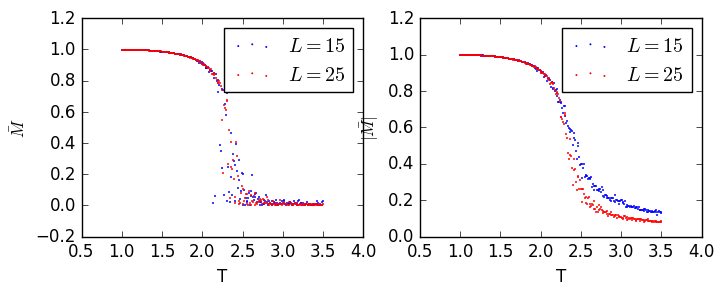

PyObject <matplotlib.legend.Legend object at 0x324979650>

In [95]:
subplot(221)
scatter(T, M, c="blue", s=2, linewidths=0, label="\$L=15\$")
scatter(T, M2, c="red", s=2, linewidths=0, label="\$L=25\$")
xlabel("T"); ylabel("\$\\bar\{M\}\$"); legend(loc=1)

subplot(222)
scatter(T, M_abs, c="blue", s=2, linewidths=0, label="\$L=15\$")
scatter(T, M_abs2, c="red", s=2, linewidths=0, label="\$L=25\$")
xlabel("T"); ylabel("\$\\bar\{|M|\}\$"); legend(loc=1)

Podemos notar que el efecto de tomar los promedios usando la definición con los valores absolutos no solo suaviza la transición de fase sino introduce un error debido al tamaño finito de la red que se está usando. Por lo tanto para recuperar propiedades físicas utilizando estas variables se debe recurrir a algo que se conoce como *escalamiento finito*. Al contrario de como es la definición usual donde la transición es más abrupta y se necesita más tiempo de computo para que es sistema visite una mayor cantidad de estados y promediar sobre estos.